In [1]:
import pandas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import tree
from IPython.display import Image, display
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [27]:

df = pandas.read_csv("credit_default_corrected_train.csv")

df = df[['ps-sep', 'ps-aug', 'ps-jul', 'ps-jun', 'ps-may', 'ps-apr', 'credit_default']]
attributes = [col for col in df.columns if col != 'credit_default']
X = df[attributes].values
y = df['credit_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=100, 
                                                    stratify=y)

clf = DecisionTreeClassifier(criterion='gini', min_samples_split=150, min_samples_leaf=20, presort=True)

In [28]:
clf.fit(X, y)

scores = cross_val_score(clf, X, y, cv=10, scoring='recall')
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.3766 (+/- 0.08)


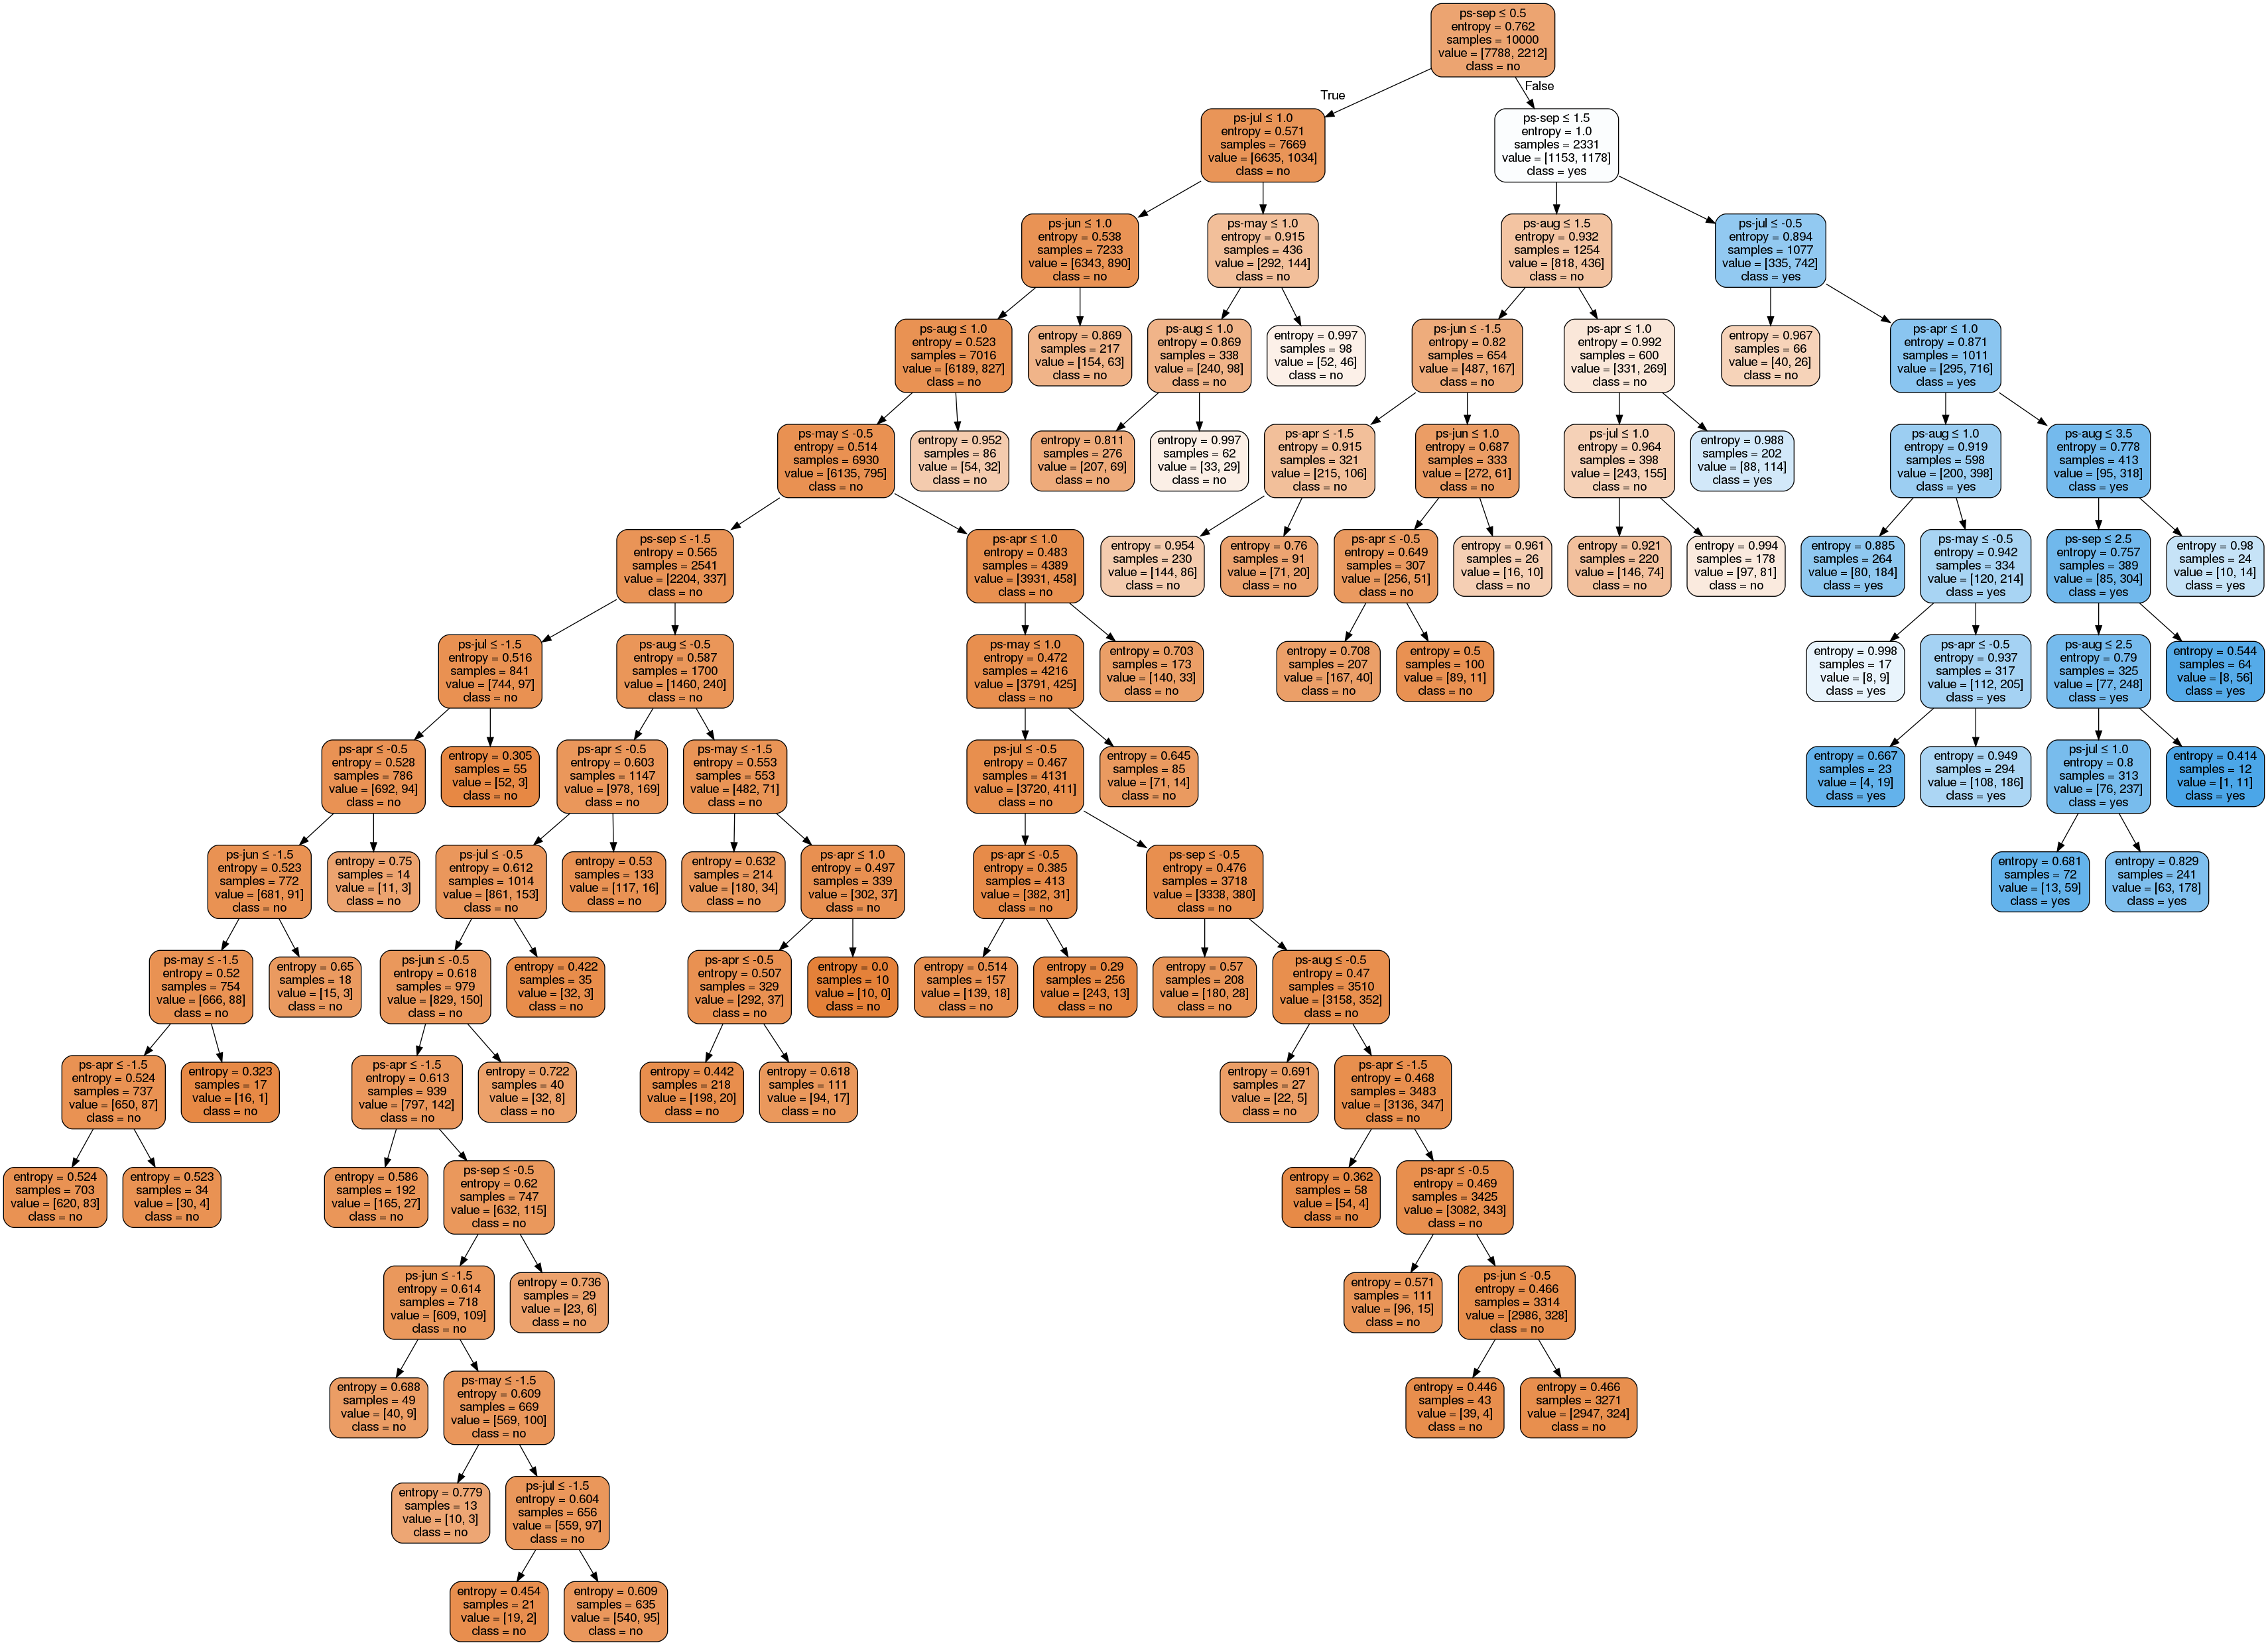

In [4]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=attributes,
                                class_names=['no','yes'],
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = numpy.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
param_list = {'min_samples_split': [2, 5, 10, 20,100,150,250],
              'min_samples_leaf': [1, 5, 10, 20,100],
              'presort': [True],
              'criterion': ['gini', 'entropy'],
              'max_features': [None, 'log2', 'sqrt']
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_

In [18]:
report(grid_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.823 (std: 0.002)
Parameters: {'max_features': None, 'min_samples_split': 150, 'criterion': 'gini', 'presort': True, 'min_samples_leaf': 20}

Model with rank: 2
Mean validation score: 0.823 (std: 0.003)
Parameters: {'max_features': 'log2', 'min_samples_split': 150, 'criterion': 'entropy', 'presort': True, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.822 (std: 0.004)
Parameters: {'max_features': 'log2', 'min_samples_split': 250, 'criterion': 'entropy', 'presort': True, 'min_samples_leaf': 5}



In [7]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=150, 
                             min_samples_leaf=20)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='recall')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.8212 (+/- 0.02)
F1-score: 0.3735 (+/- 0.08)


In [9]:
clf = MLPClassifier(activation='logistic', alpha=1e-6)

param_list = {
                'activation': ['logistic', 'relu'],
                'alpha': [1e-5, 1e-6, 1e-7],
                'solver': ['lbfgs', 'sgd', 'adam']
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_
report(grid_search.cv_results_, n_top=3)

/usr/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, X, y, cv=2)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:

clf = GaussianNB(priors=[1-n, n])

In [ ]:
scores = cross_val_score(clf, X, y, cv=30)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [ ]:
param_list = {'max_depth': [None] + list(numpy.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100]
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [ ]:
report(random_search.cv_results_, n_top=3)